# QUICKSORT

Dear students,
The last sorting algorithm, we are focusing on is - Quicksort. As an individual assignment, please implement Quicksort as function and measure the execution time for different lengths of input lists. What is the time complexity you are observing for the worst, average and best case?
Happy programming!

In [1]:
from random import random
import time
import random
import matplotlib.pyplot as plt

In [2]:
a = [22, 10765, 147, 156, 2465, 23, 31, 98, 11, 9, 7, 34, 25, 990, 10, 64]

### Defined below is a function to perform QUICKSORT

In [3]:
def quicksort(list, start, end):
    
    def  split (list, start, end):
        key = list[end]
        split_index = start
        for index in range(start, end):
            if list[index] <= key:
                temp = list[index]
                list[index] = list[split_index]
                list[split_index] = temp
                split_index = split_index + 1
        list[end] = list[split_index]
        list[split_index] = key
        return split_index
    
    if start < end:
        s_index = split (list, start, end)
        quicksort(list , start, s_index - 1)
        quicksort(list, s_index + 1, end)
    return list

In [4]:
sorted_list = quicksort(a, 0, len(a) - 1)
print(sorted_list)

[7, 9, 10, 11, 22, 23, 25, 31, 34, 64, 98, 147, 156, 990, 2465, 10765]


### Following this point below is the code to measure execution time for different lengths of lists in worst, average and good case scenarios. Time complexities are explained towards the end.

In [5]:
lengths_to_run = [100, 200, 500, 1000, 1500]
sorted_lists_results = []
inversely_sorted_lists_results = []
random_list_results = []

[0.0030028820037841797, 0.00500798225402832, 0.051013946533203125, 0.15381097793579102, 0.28467702865600586]
[0.00015115737915039062, 0.00032711029052734375, 0.001096963882446289, 0.0023539066314697266, 0.004066944122314453]
[0.0007579326629638672, 0.0028781890869140625, 0.02022099494934082, 0.08680295944213867, 0.19437503814697266]


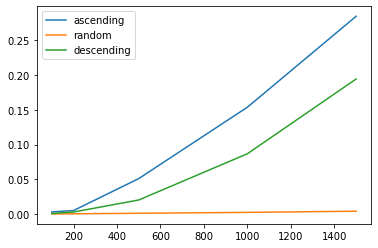

In [6]:
def run_sort(list_,scenario):
    if scenario == "ascending":
        pass
    elif scenario == "random":
        random.shuffle (list_)
    elif scenario == "descending":
        list_ = list_[::-1]
    
    time_begin = time.time()
    quicksort(list_, 0, len(list_) - 1)
    time_end = time.time()
    time_to_run = time_end - time_begin
    return time_to_run

for lengths in lengths_to_run: 
    list_to_be_sorted = list (range (1, lengths))
    time_elapsed = run_sort(list_ = list_to_be_sorted, scenario = "ascending") #the run_sort function does not change the arrangement of the numbers here to generate the input list as the scenario is 'ascending' already. 
    sorted_lists_results.append(time_elapsed)

for lengths in lengths_to_run: 
    list_to_be_sorted = list (range (1, lengths))
    time_elapsed = run_sort(list_ = list_to_be_sorted, scenario = "random") #the run_sort function randomly shuffles the arrangement of the numbers here to generate the input list as the scenario is 'random'.
    random_list_results.append(time_elapsed)

for lengths in lengths_to_run: 
    list_to_be_sorted = list (range (1, lengths))
    time_elapsed = run_sort(list_ = list_to_be_sorted, scenario = "descending") #the run_sort function reverses the arrangement of the numbers here to generate the input list as the scenario is 'descending'.
    inversely_sorted_lists_results.append(time_elapsed)

print (sorted_lists_results)
print (random_list_results)
print (inversely_sorted_lists_results)

plt.plot(lengths_to_run, sorted_lists_results, label = "ascending")
plt.plot(lengths_to_run, random_list_results, label = "random")
plt.plot(lengths_to_run, inversely_sorted_lists_results, label = "descending")
plt.legend()
plt.show()

### Analysis of Time Complexities:

1. Best case scenario:
Best case mostly occurs for a randomly arranged input list. The partitioning or the split happens in such a way that whenever two sublists are identified from a large random original list, then due to the randomness of the original list, chances are that the two new lists are more or less of the same length to each other and close to half the size of the original list.
Time complexity of 'split' function ~ (constant)*n as it goes through each element to compare it with the key/pivot
'Quicksort' function's best-case time complexity => T(n) = 2T(n/2) + (constant)*n {derived from two half sized-list recurrances + split function} 
=> Overall time complexity = O(nLog(n))

2. Worst case scenario:
The worst case occurs when the split process always picks the greatest or smallest element as the pivot. If we consider a split strategy where the last element is always picked as a pivot, the worst case would occur when the list is throughout ascending and throughout descending
The 'split' function leaves only one sub-list (either to the left or to the right of the split_index). So, effectively recursion takes place on one subsequent list but the list is of almost the same length as the original list.
Time complexity of 'split' function ~ (constant)*n as it goes through each element to compare it with the key/pivot
'Quicksort' function's worst-case time complexity => T(n) = T(n-1) + (constant)*n {derived from one same sized-list recurrance + split function} 
=> Overall time complexity = O(n^2)

3. Average case scenario:
In average case we can have all kinds of split with equal probabilities. So, if the randomly chosen key/pivot lies on the 'ith' index, the intuition is:
'Quicksort' function's average-case time complexity => T(n) = T(i-1) + T(n - i) + (constant)*n
Since, 'i' can be any index with equal probability, true T(n) = (1/n) * [Sum {T(i-1) + T(n - i)} over all i]  + (constant)*n
=> Overall time complexity = O(nLog(n))

The explaination of time complexities is in sync with the graphs produced in this exercise.
